In [1]:
df = pd.read_pickle('data/df_feats.pkl')
print(df.shape)
df[:3]

(87599, 262)


,time,wind_dir,wind_dir_lag1,wind_dir_lag24,wind_dir_RM_lag1_WS3,wind_dir_S_RM_lag1_SL24_WS3,wind_dir_lag1to3,wind_dir_lag24to72,wind_speed,wind_speed_lag1,wind_speed_lag24,wind_speed_RM_lag1_WS3,wind_speed_S_RM_lag1_SL24_WS3,wind_speed_lag1to3,wind_speed_lag24to72,wind_gust,wind_gust_lag1,wind_gust_lag24,wind_gust_RM_lag1_WS3,wind_gust_S_RM_lag1_SL24_WS3,wind_gust_lag1to3,wind_gust_lag24to72,vis,vis_lag1,vis_lag24,vis_RM_lag1_WS3,vis_S_RM_lag1_SL24_WS3,vis_lag1to3,vis_lag24to72,temp,temp_lag1,temp_lag24,temp_RM_lag1_WS3,temp_S_RM_lag1_SL24_WS3,temp_lag1to3,temp_lag24to72,dewpt,dewpt_lag1,dewpt_lag24,dewpt_RM_lag1_WS3,dewpt_S_RM_lag1_SL24_WS3,dewpt_lag1to3,dewpt_lag24to72,press,press_lag1,press_lag24,press_RM_lag1_WS3,press_S_RM_lag1_SL24_WS3,press_lag1to3,press_lag24to72,vis_unclear_flg,vis_unclear_flg_lag1,vis_unclear_flg_lag24,vis_unclear_flg_RM_lag1_WS3,vis_unclear_flg_S_RM_lag1_SL24_WS3,vis_unclear_flg_lag1to3,vis_unclear_flg_lag24to72,wind_speed_flg,wind_speed_flg_lag1,wind_speed_flg_lag24,wind_speed_flg_RM_lag1_WS3,wind_speed_flg_S_RM_lag1_SL24_WS3,wind_speed_flg_lag1to3,wind_speed_flg_lag24to72,wind_gust_flg,wind_gust_flg_lag1,wind_gust_flg_lag24,wind_gust_flg_RM_lag1_WS3,wind_gust_flg_S_RM_lag1_SL24_WS3,wind_gust_flg_lag1to3,wind_gust_flg_lag24to72,wind_dir_flg,wind_dir_flg_lag1,wind_dir_flg_lag24,wind_dir_flg_RM_lag1_WS3,...,sky_flg_OVC_S_RM_lag1_SL24_WS3,sky_flg_OVC_lag1to3,sky_flg_OVC_lag24to72,sky_flg_CLR,sky_flg_CLR_lag1,sky_flg_CLR_lag24,sky_flg_CLR_RM_lag1_WS3,sky_flg_CLR_S_RM_lag1_SL24_WS3,sky_flg_CLR_lag1to3,sky_flg_CLR_lag24to72,sky_flg_CB,sky_flg_CB_lag1,sky_flg_CB_lag24,sky_flg_CB_RM_lag1_WS3,sky_flg_CB_S_RM_lag1_SL24_WS3,sky_flg_CB_lag1to3,sky_flg_CB_lag24to72,sky_flg_TCU,sky_flg_TCU_lag1,sky_flg_TCU_lag24,sky_flg_TCU_RM_lag1_WS3,sky_flg_TCU_S_RM_lag1_SL24_WS3,sky_flg_TCU_lag1to3,sky_flg_TCU_lag24to72,sky_avg_BKN,sky_avg_BKN_lag1,sky_avg_BKN_lag24,sky_avg_BKN_RM_lag1_WS3,sky_avg_BKN_S_RM_lag1_SL24_WS3,sky_avg_BKN_lag1to3,sky_avg_BKN_lag24to72,sky_avg_CB,sky_avg_CB_lag1,sky_avg_CB_lag24,sky_avg_CB_RM_lag1_WS3,sky_avg_CB_S_RM_lag1_SL24_WS3,sky_avg_CB_lag1to3,sky_avg_CB_lag24to72,sky_avg_CLR,sky_avg_CLR_lag1,sky_avg_CLR_lag24,sky_avg_CLR_RM_lag1_WS3,sky_avg_CLR_S_RM_lag1_SL24_WS3,sky_avg_CLR_lag1to3,sky_avg_CLR_lag24to72,sky_avg_FEW,sky_avg_FEW_lag1,sky_avg_FEW_lag24,sky_avg_FEW_RM_lag1_WS3,sky_avg_FEW_S_RM_lag1_SL24_WS3,sky_avg_FEW_lag1to3,sky_avg_FEW_lag24to72,sky_avg_OVC,sky_avg_OVC_lag1,sky_avg_OVC_lag24,sky_avg_OVC_RM_lag1_WS3,sky_avg_OVC_S_RM_lag1_SL24_WS3,sky_avg_OVC_lag1to3,sky_avg_OVC_lag24to72,sky_avg_SCT,sky_avg_SCT_lag1,sky_avg_SCT_lag24,sky_avg_SCT_RM_lag1_WS3,sky_avg_SCT_S_RM_lag1_SL24_WS3,sky_avg_SCT_lag1to3,sky_avg_SCT_lag24to72,sky_avg_TCU,sky_avg_TCU_lag1,sky_avg_TCU_lag24,sky_avg_TCU_RM_lag1_WS3,sky_avg_TCU_S_RM_lag1_SL24_WS3,sky_avg_TCU_lag1to3,sky_avg_TCU_lag24to72,dt_month,dt_hour
49,2014-01-03 01:00:00,230.00,230.00,110.00,230.00,126.67,1.00,0.87,5.00,5.00,6.00,5.67,6.67,0.88,0.90,18.00,18.00,18.00,18.00,17.00,1.00,1.06,10.00,10.00,10.00,10.00,10.00,1.00,1.00,23.00,24.00,24.00,25.00,23.67,0.96,1.01,20.00,19.00,22.00,19.00,19.67,1.00,1.12,29.96,29.95,30.09,29.94,30.08,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,1.00,1.00,1.00,1.00,...,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,000.00","3,000.00","1,200.00","3,033.33","1,500.00",0.99,0.80,0.00,0.00,0.00,0.00,833.33,0.00,0.00,0.00,0.00,0.00,0.00,"8,333.33",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,1
50,2014-01-03 02:00:00,220.00,230.00,120.00,233.33,126.67,0.99,0.95,4.00,5.00,6.00,5.00,6.67,1.00,0.90,18.00,18.00,18.00,18.00,17.00,1.00,1.06,10.00,10.00,10.00,10.00,10.00,1.00,1.00,23.00,23.00,24.00,24.00,23.33,0.96,1.03,21.00,20.00,22.00,19.33,20.00,1.03,1.10,29.96,29.96,30.09,29.95,3

In [2]:
df0 = pd.read_pickle('data/df.pkl')
feats_target = list(df0.columns)

In [3]:
sky_used = ['BKN','FEW','SCT','OVC','CLR','CB','TCU']

In [4]:
# feats
feat_flg = ''

feat_target_cat = 'sky_flg_BKN'
feat_target     = 'sky_cnt_BKN'
feat_target2    = 'sky_avg_BKN'

# feat_target_cat = 'sky_flg_FEW'
# feat_target     = 'sky_cnt_FEW'
# feat_target2    = 'sky_avg_FEW'

# feat_target_cat = 'sky_flg_SCT'
# feat_target     = 'sky_cnt_SCT'
# feat_target2    = 'sky_avg_SCT'

# feat_target_cat = 'sky_flg_OVC'
# feat_target     = 'sky_cnt_OVC'
# feat_target2    = 'sky_avg_OVC'

# feat_target_cat = 'sky_flg_CLR'
# feat_target     = 'sky_cnt_CLR'
# feat_target2    = 'sky_avg_CLR'

# feat_target_cat = 'sky_flg_CB'
# feat_target     = 'sky_cnt_CB'
# feat_target2    = 'sky_avg_CB'

# feat_target_cat = 'sky_flg_TCU'
# feat_target     = 'sky_cnt_TCU'
# feat_target2    = 'sky_avg_TCU'

flg_round = True

### Statistics

<Axes: title={'center': 'Average cloud height'}>

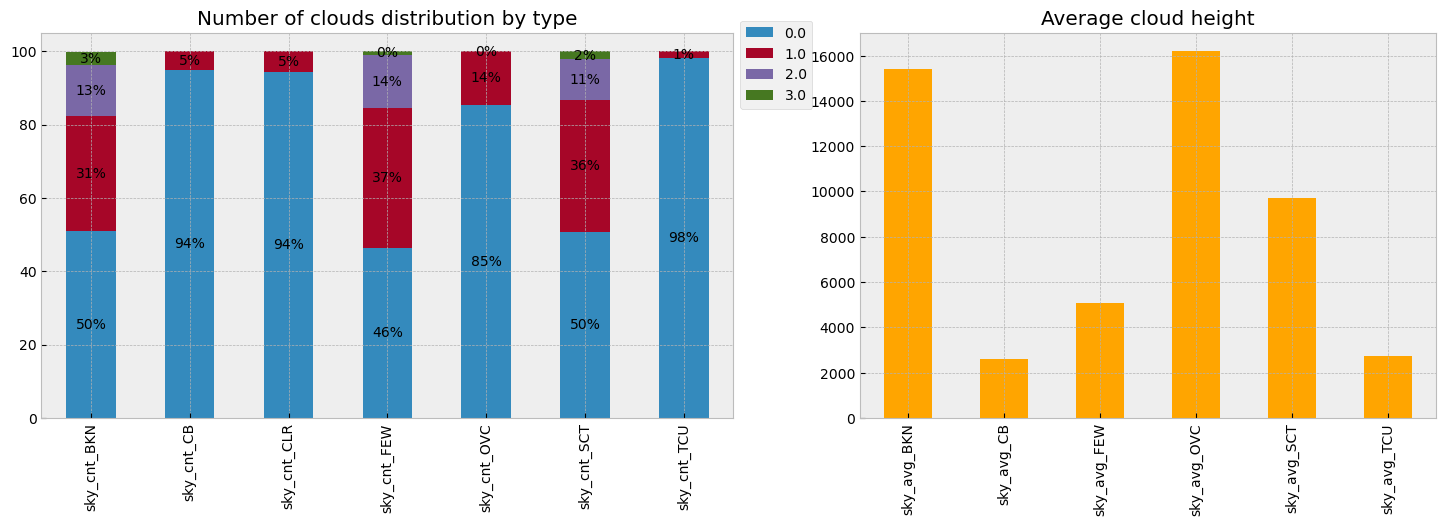

In [36]:
# plot 1
_, ax = plt.subplots(1,2, figsize = (18,5), width_ratios = [1.2,1], sharex = False)

df_st = pd.melt(df, id_vars = 'time', value_vars = ['sky_cnt_'+ f for f in sky_used]).groupby(['variable','value']).size().unstack()
df_st = 100*df_st.apply(lambda x: x/x.sum(), axis = 1)
del df_st[5]
del df_st[4]

p = df_st.plot(ax = ax[0], kind = 'bar', stacked = True, legend = True, title = 'Number of clouds distribution by type', xlabel = '')
_ = p.legend(bbox_to_anchor=(1., 1.05))
for c in p.containers:
    labels = [f'{int(v.get_height())}%' if v.get_height() > 0 else '' for v in c]
    p.bar_label(c, labels=labels, label_type='center')
    
# plot 2
df_st = pd.melt(df, id_vars = 'time', value_vars = ['sky_avg_'+ f for f in sky_used])
df_st[df_st.value > 0].groupby(['variable']).value.mean().plot(ax = ax[1], kind = 'bar', color = 'orange', title = 'Average cloud height', xlabel = '')

# plt.tight_layout()

### Xgboost classification model

In [6]:
feats_used   = [f for f in df.columns if f not in feats_target + ['time']]
# feats_used   = [f for f in df_all.columns if f not in feats_target and f.startswith(feat_target)] # only target related feats

# 1) create datasets
f1 = df.time <= '2022-12-31'
x,y   = df.loc[f1, feats_used], df.loc[f1, feat_target_cat]
xt,yt = df.loc[~f1, feats_used], df.loc[~f1, feat_target_cat]

print(x.shape, xt.shape)

(78816, 224) (8783, 224)


In [7]:
y.mean(), yt.mean()

(0.49247614, 0.48434475)

[0]	train-logloss:0.67262	valid-logloss:0.67184
[329]	train-logloss:0.40408	valid-logloss:0.43777


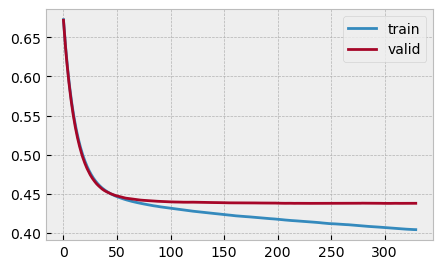

In [8]:
# 2) Training process
import xgboost as xgb

x_ = xgb.DMatrix(x.values, 
                label = y, 
                feature_names = feats_used)
xt_ = xgb.DMatrix(xt.values, 
                label = yt, 
                feature_names = feats_used) 

params = {
        'booster': 'gbtree',
        'tree_method': 'hist',
        'objective': 'binary:logistic',
        # 'objective': 'reg:absoluteerror', 
        'eval_metric': 'logloss',
        'eta': 0.05,
        'max_depth': 5,  # -1 means no limit
        'subsample': 1,  # Subsample ratio of the training instance.
        'colsample_bytree': 1,  # Subsample ratio of columns when constructing each tree.
        'reg_alpha': 0,  # L1 regularization term on weights
        'reg_lambda': 0,  # L2 regularization term on weights
        'nthread': -1,
        'verbosity': 0
    }       

early_stopping_rounds = 100
num_boost_round       = 1000

evals_results = dict()
model_xgb = xgb.train(params, 
             x_, 
             evals=[
                 (x_,'train'), 
                 (xt_,'valid'),
             ], 
             evals_result=evals_results, 
             num_boost_round=num_boost_round,
             early_stopping_rounds=early_stopping_rounds,
             verbose_eval=1000)

# Learning curve
df_evals = pd.DataFrame({
            'train': evals_results['train']['logloss'],
            'valid': evals_results['valid']['logloss'],
})
_ = df_evals.plot(figsize = (5,3))

In [9]:
# 3) predictions
y_pred_last = xt[f'{feat_target_cat}_lag1']
y_pred = model_xgb.predict(xt_)

# find threshhold
c = round(np.percentile(y_pred, q = (1-yt.mean())*100), 4)
print(c)

mape1 = 100*metrics.accuracy_score(yt, y_pred_last)
mape2 = 100*metrics.accuracy_score(yt, y_pred > c)

print(f'Last value ACC:    {mape1:.2f}%')
print(f'Xgboost Model ACC: {mape2:.2f}%')

0.5372
Last value ACC:    80.03%
Xgboost Model ACC: 81.24%


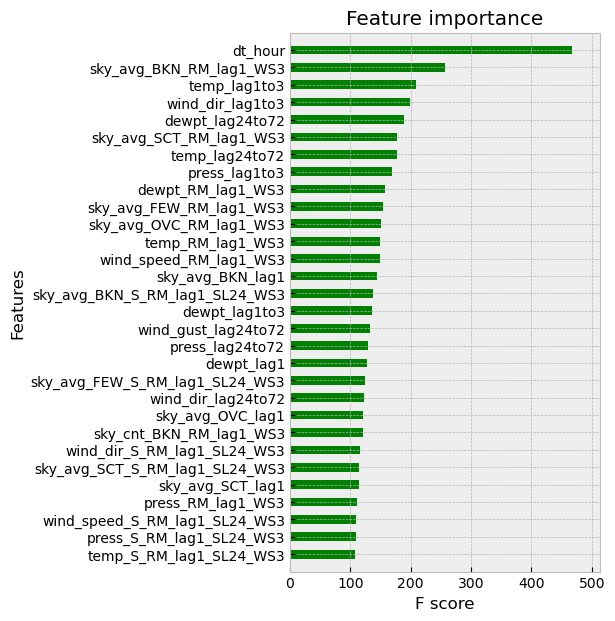

In [10]:
# Feature importances
_, ax = plt.subplots(1,1, figsize = (4,7))
_ = xgb.plot_importance(model_xgb, ax = ax, max_num_features=30, height=0.5, 
                        show_values=False, color = 'green')

In [11]:
model_xgb.save_model(f'models/{feat_target_cat}.pkl')

### Xgboost regression model

In [12]:
feats_used   = [f for f in df.columns if f not in feats_target + ['time']]
# feats_used   = [f for f in df_all.columns if f not in feats_target and f.startswith(feat_target)] # only target related feats

# 1) create datasets
f1 = df.reset_index().time <= '2022-12-31'
f2 = df.reset_index()[feat_target_cat] == 1
if feat_flg == '':
    filt_train = f1&f2
    filt_test = ~f1&f2
else:
    f3 = df[feat_flg] == 1
    filt_train = f1&f2&f3
    filt_test = ~f1&f2&f3
    
x,y   = df.reset_index().loc[filt_train, feats_used], df.reset_index().loc[filt_train, feat_target]
xt,yt = df.reset_index().loc[filt_test,  feats_used], df.reset_index().loc[filt_test,  feat_target]

print(x.shape, xt.shape)

(38815, 224) (4254, 224)


[0]	train-mae:0.43359	valid-mae:0.46776
[382]	train-mae:0.37076	valid-mae:0.41935


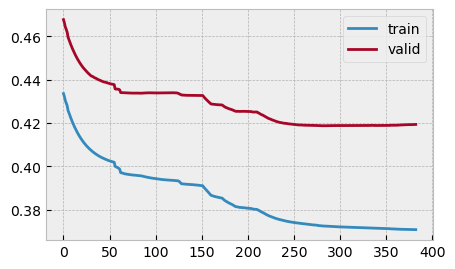

In [13]:
# 2) Training process
import xgboost as xgb

x_ = xgb.DMatrix(x.values, 
                label = y, 
                feature_names = feats_used)
xt_ = xgb.DMatrix(xt.values, 
                label = yt, 
                feature_names = feats_used) 

params = {
        'booster': 'gbtree',
        'tree_method': 'hist',
        'objective': 'reg:absoluteerror', 
        # 'eval_metric': 'logloss',
        'eta': 0.05,
        'max_depth': 5,  # -1 means no limit
        'subsample': 1,  # Subsample ratio of the training instance.
        'colsample_bytree': 1,  # Subsample ratio of columns when constructing each tree.
        'reg_alpha': 0,  # L1 regularization term on weights
        'reg_lambda': 0,  # L2 regularization term on weights
        'nthread': -1,
        'verbosity': 0
    }       

early_stopping_rounds = 100
num_boost_round       = 1000

evals_results = dict()
model_xgb = xgb.train(params, 
             x_, 
             evals=[
                 (x_,'train'), 
                 (xt_,'valid'),
             ], 
             evals_result=evals_results, 
             num_boost_round=num_boost_round,
             early_stopping_rounds=early_stopping_rounds,
             verbose_eval=1000)

# Learning curve
df_evals = pd.DataFrame({
            'train': evals_results['train']['mae'],
            'valid': evals_results['valid']['mae'],
})
_ = df_evals.plot(figsize = (5,3))

In [14]:
# # 3) predictions
# y_pred_last = xt[f'{feat_target}_lag1']
# y_pred = model_xgb.predict(xt_)
# if flg_round:
#     y_pred = y_pred.round()

# mape1 = 100*np.mean(np.abs((yt - y_pred_last) / yt))
# mape2 = 100*np.mean(np.abs((yt - y_pred) / yt))

# print(f'Last value MAPE:    {mape1:.2f}%')
# print(f'Xgboost Model MAPE: {mape2:.2f}%')

In [15]:
# 3) predictions
y_pred_last = xt[f'{feat_target}_lag1']
y_pred = model_xgb.predict(xt_)
if flg_round:
    y_pred = y_pred.round()

mape1 = np.mean(np.abs((yt - y_pred_last)))
mape2 = np.mean(np.abs((yt - y_pred)))

print(f'Last value MAE:    {mape1:.2f}')
print(f'Xgboost Model MAE: {mape2:.2f}')

Last value MAE:    0.64
Xgboost Model MAE: 0.42


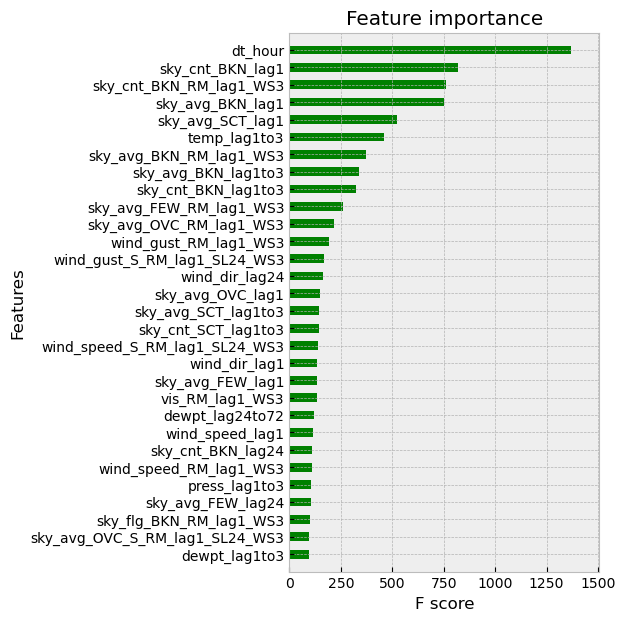

In [16]:
# Feature importances
_, ax = plt.subplots(1,1, figsize = (4,7))
_ = xgb.plot_importance(model_xgb, ax = ax, max_num_features=30, height=0.5, 
                        show_values=False, color = 'green')

In [17]:
model_xgb.save_model(f'models/{feat_target}.pkl')

### Xgboost regression model

In [18]:
feats_used   = [f for f in df.columns if f not in feats_target + ['time']]
# feats_used   = [f for f in df_all.columns if f not in feats_target and f.startswith(feat_target)] # only target related feats

# 1) create datasets
f1 = df.reset_index().time <= '2022-12-31'
f2 = df.reset_index()[feat_target_cat] == 1
if feat_flg == '':
    filt_train = f1&f2
    filt_test = ~f1&f2
else:
    f3 = df[feat_flg] == 1
    filt_train = f1&f2&f3
    filt_test = ~f1&f2&f3
    
x,y   = df.reset_index().loc[filt_train, feats_used], df.reset_index().loc[filt_train, feat_target2]
xt,yt = df.reset_index().loc[filt_test,  feats_used], df.reset_index().loc[filt_test,  feat_target2]

print(x.shape, xt.shape)

(38815, 224) (4254, 224)


[0]	train-mae:7540.52582	valid-mae:7541.89911
[619]	train-mae:3530.41335	valid-mae:3677.31178


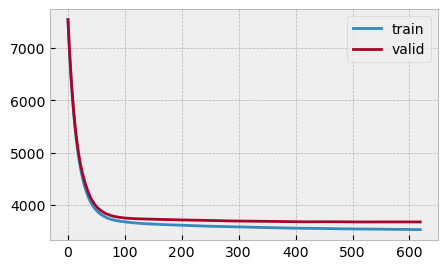

In [19]:
# 2) Training process
import xgboost as xgb

x_ = xgb.DMatrix(x.values, 
                label = y, 
                feature_names = feats_used)
xt_ = xgb.DMatrix(xt.values, 
                label = yt, 
                feature_names = feats_used) 

params = {
        'booster': 'gbtree',
        'tree_method': 'hist',
        'objective': 'reg:absoluteerror', 
        # 'eval_metric': 'logloss',
        'eta': 0.05,
        'max_depth': 5,  # -1 means no limit
        'subsample': 1,  # Subsample ratio of the training instance.
        'colsample_bytree': 1,  # Subsample ratio of columns when constructing each tree.
        'reg_alpha': 0,  # L1 regularization term on weights
        'reg_lambda': 0,  # L2 regularization term on weights
        'nthread': -1,
        'verbosity': 0
    }       

early_stopping_rounds = 100
num_boost_round       = 1000

evals_results = dict()
model_xgb = xgb.train(params, 
             x_, 
             evals=[
                 (x_,'train'), 
                 (xt_,'valid'),
             ], 
             evals_result=evals_results, 
             num_boost_round=num_boost_round,
             early_stopping_rounds=early_stopping_rounds,
             verbose_eval=1000)

# Learning curve
df_evals = pd.DataFrame({
            'train': evals_results['train']['mae'],
            'valid': evals_results['valid']['mae'],
})
_ = df_evals.plot(figsize = (5,3))

In [20]:
# # 3) predictions
# y_pred_last = xt[f'{feat_target}_lag1']
# y_pred = model_xgb.predict(xt_)
# if flg_round:
#     y_pred = y_pred.round()

# mape1 = 100*np.mean(np.abs((yt - y_pred_last) / yt))
# mape2 = 100*np.mean(np.abs((yt - y_pred) / yt))

# print(f'Last value MAPE:    {mape1:.2f}%')
# print(f'Xgboost Model MAPE: {mape2:.2f}%')

In [21]:
# 3) predictions
y_pred_last = xt[f'{feat_target2}_lag1']
y_pred = model_xgb.predict(xt_)
if flg_round:
    y_pred = y_pred.round()

mape1 = np.mean(np.abs((yt - y_pred_last)))
mape2 = np.mean(np.abs((yt - y_pred)))

print(f'Last value MAE:    {mape1:.2f}')
print(f'Xgboost Model MAE: {mape2:.2f}')

Last value MAE:    5546.71
Xgboost Model MAE: 3677.31


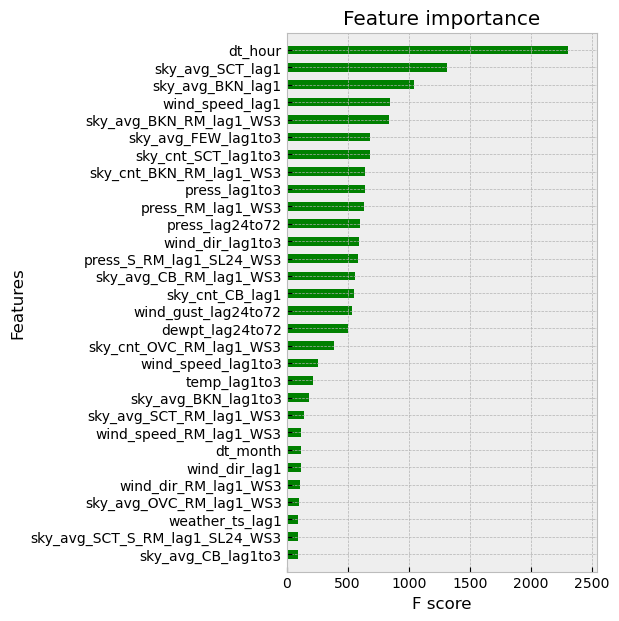

In [22]:
# Feature importances
_, ax = plt.subplots(1,1, figsize = (4,7))
_ = xgb.plot_importance(model_xgb, ax = ax, max_num_features=30, height=0.5, 
                        show_values=False, color = 'green')

In [23]:
model_xgb.save_model(f'models/{feat_target2}.pkl')

### Results

In [27]:
txt = '''0.5372
Last value ACC:    80.03%
Xgboost Model ACC: 81.24%
Last value MAE:    0.64
Xgboost Model MAE: 0.42
Last value MAE:    5546.71
Xgboost Model MAE: 3677.31
0.5279
Last value ACC:    71.30%
Xgboost Model ACC: 72.92%
Last value MAE:    0.54
Xgboost Model MAE: 0.26
Last value MAE:    2868.08
Xgboost Model MAE: 2199.47
0.5361
Last value ACC:    68.84%
Xgboost Model ACC: 70.31%
Last value MAE:    0.66
Xgboost Model MAE: 0.28
Last value MAE:    5716.60
Xgboost Model MAE: 3980.10
0.3971
Last value ACC:    92.39%
Xgboost Model ACC: 92.55%
Last value MAE:    0.28
Xgboost Model MAE: 0.00
Last value MAE:    6578.40
Xgboost Model MAE: 3545.35
0.3039
Last value ACC:    96.35%
Xgboost Model ACC: 96.38%
Last value MAE:    0.31
Xgboost Model MAE: 0.00
Last value MAE:    0.31
Xgboost Model MAE: 0.00
0.2848
Last value ACC:    93.97%
Xgboost Model ACC: 94.09%
Last value MAE:    0.52
Xgboost Model MAE: 0.00
Last value MAE:    1717.49
Xgboost Model MAE: 466.67
0.1407
Last value ACC:    98.57%
Xgboost Model ACC: 98.49%
Last value MAE:    0.75
Xgboost Model MAE: 0.00
Last value MAE:    2311.90
Xgboost Model MAE: 343.02'''
txt = re.findall('[0-9.]+', txt)
pd.DataFrame(np.array(txt).reshape(7,-1))

,0,1,2,3,4,5,6
0,0.5372,80.03,81.24,0.64,0.42,5546.71,3677.31
1,0.5279,71.30,72.92,0.54,0.26,2868.08,2199.47
2,0.5361,68.84,70.31,0.66,0.28,5716.60,3980.10
3,0.3971,92.39,92.55,0.28,0.00,6578.40,3545.35
4,0.3039,96.35,96.38,0.31,0.00,0.31,0.00
5,0.2848,93.97,94.09,0.52,0.00,1717.49,466.67
6,0.1407,98.57,98.49,0.75,0.00,2311.90,343.02
